# Practice 1：The base

In [ ]:
import random

import time

import matplotlib.pyplot as plt



def linearSearch(A,x):

    j=0

    while j<len(A) and x!=A[j]:

        j=j+1



    if j<len(A):

        return j

    else:

        return -1



def binarySearch(A,low,high,x):

    j=-1

    while low <= high and j==-1:

        mid =(low + high) // 2

        if x == A[mid]:

            j=mid

        elif x < A[mid]:

            high=mid -1

        else:

            low =mid + 1

    return j



def insertSort(A):

    for i in range(1, len(A)):

        x = A[i]

        j = i - 1

        while j >= 0 and A[j]>x:

            j -=1

        k=j+1

        for j in range(i-1,k-1,-1):

            A[j+1] = A[j]

        A[k] = x



def modBinarySearch(A,low,high,x):

    j=-1

    while low <= high and j==-1:

        mid =(low + high) // 2

        if x == A[mid]:

            j=mid

        elif x < A[mid]:

            high=mid -1

        else:

            low =mid + 1

    if j==-1:

        return low

    else:

        return j



def modInsertSort(A):

    for i in range(1, len(A)):

        x = A[i]

        k=modBinarySearch(A,0,i-1,x)

        for j in range(i-1,k-1,-1):

            A[j+1] = A[j]

        A[k] = x



def merge(A,p,q,r):

    B=A.copy()

    s=p

    t=q+1

    k=p



    while s<=q and t<=r:

        if A[s]<=A[t]:

            B[k]=A[s]

            s=s+1

        else:

            B[k]=A[t]

            t=t+1

        k=k+1



    if s==q+1:

        B[k:r+1] = A[t:r+1]

    else:

        B[k:r+1] = A[s:q+1]

    A[p:r+1]=B[p:r+1]



def mergeSort(A,low,high):

    if low<high:

        mid=(high+low)//2

        mergeSort(A,low,mid)

        mergeSort(A, mid+1,high)

        merge(A,low,mid,high)



scales=[100,300,500,1000,3000,5000,10000,30000,50000]

#scales=[100,300,500,1000,3000,5000]

timeCosume1=[]

timeCosume2=[]

timeCosume3=[]

timeCosume4=[]

timeCosume5=[]

A=[]

for k in range(len(scales)):

    for i in range(scales[k]):

        A.append(random.randint(0,50000))

    x=random.randint(0,50000)



    B=A.copy()

    B.sort()

    start=time.time()

    linearSearch(B,x)

    end=time.time()

    timeCosume1.append(end-start)



    start=time.time()

    binarySearch(B,x,0,len(B)-1)

    end=time.time()

    timeCosume2.append(end-start)



    B=A.copy()

    start=time.time()

    insertSort(B)

    end=time.time()

    timeCosume3.append(end-start)



    B=A.copy()

    start=time.time()

    modInsertSort(B)

    end=time.time()

    timeCosume4.append(end-start)



    B=A.copy()

    start=time.time()

    mergeSort(B,0,len(B)-1)

    end=time.time()

    timeCosume5.append(end-start)



plt.plot(scales, timeCosume1, 'b', label='LinearSearch')

plt.plot(scales, timeCosume2, 'r', label='BinarySearch')

plt.title('LinearSearch & BinarySearch')

plt.xlabel('problem scale')

plt.ylabel('time consume')

plt.legend()

plt.show()



plt.clf()

plt.plot(scales, timeCosume3, 'b', label='InsertSort')

plt.plot(scales, timeCosume4, 'r', label='ModInsertSort')

plt.plot(scales, timeCosume5, 'g', label='MergeSort')

plt.title('InsertSort, ModInsertSort & MergeSort')

plt.xlabel('problem scale')

plt.ylabel('time consume')

plt.legend()

plt.show()



#linearSearch和binarySearch的时间复杂性分别为T1(n)=O(n)和T2(n)=O(logn)

#InserSort, ModInsertSort和MergeSort的时间复杂性分别为T3(n)=O(n2), T4(n)=O(n2)和T5(n)= Q(nlogn)

#试运行产生的图像如下

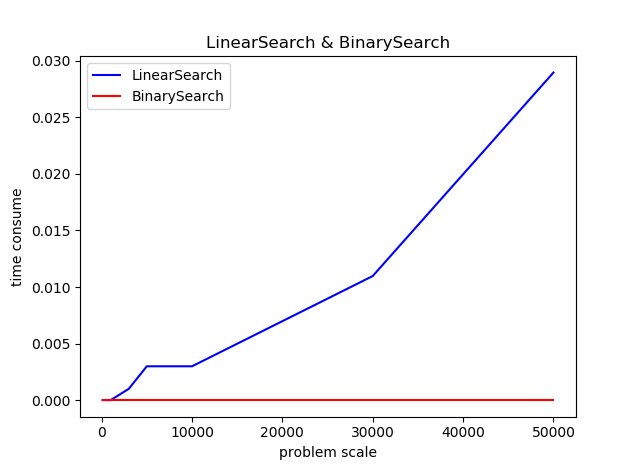

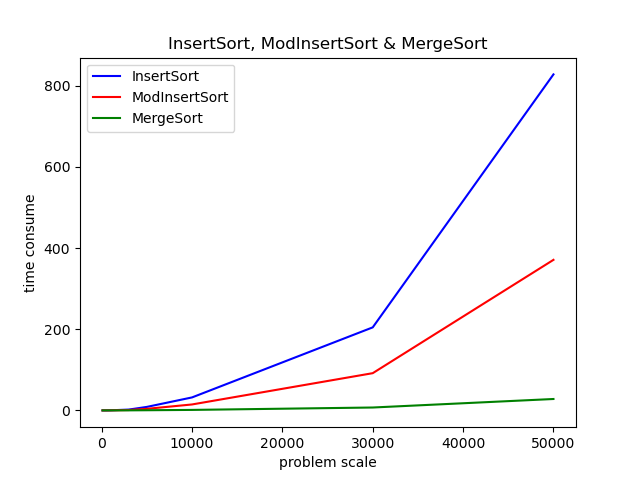

# Practice 2: Divide and Conquer

In [ ]:
#Problem1

def merge(A,p,q,r):

    s=p

    t=q+1

    k=p

    B=[0]*len(A)

    while s<=q and t<=r:

        if A[s]<=A[t]:

            B[k]=A[s]

            s=s+1

        else:

            B[k]=A[t]

            t=t+1

        k=k+1



    if s==q+1:

        B[k:r+1] = A[t:r+1]

    else:

        B[k:r+1] = A[s:q+1]

    A[p:r+1]=B[p:r+1]



def mySort(A,k):

    n=len(A)

    for i in range(1,k):

        merge(A,0,n//k*i-1,n//k*(i+1)-1)



def mySort_mod(A,low,high,k):

    if k>1:

        mid=(low+high)//2

        mySort_mod(A,low,mid,k//2)

        mySort_mod(A,mid+1,high,k//2)

        merge(A,low,mid,high)



A=[1,9,2,8,3,7,5,6]

k=4

#mySort(A,k)

mySort_mod(A,0,len(A)-1,k)

print(A)



#Problem 2

def majorityElement1(A,low ,high):

    if low==high:

        return A[low]

    

    mid=(low+high)//2

    left=majorityElement1(A,low,mid)

    right=majorityElement1(A,mid+1 ,high)

    if left==right:

        return left

    else:

        lcount=0

        for i in range(low,high+1):

            if A[i]==left:

                lcount+=1

        if lcount>(high-low+1)//2:

            return left

        else:

            return right



#另一个思路，借鉴quickSort中的划分

import random

def random_partition(A,p,q):

    y=random.randint(p,q)

    A[y],A[p]=A[p],A[y]

    x=A[p]

    i=p

    for j in range(p+1,q+1):

        if A[j]<=x:

            i=i+1

            A[i],A[j]=A[j],A[i]

    A[p],A[i]=A[i],A[p]

    return i



def majorityElement2(A,low ,high):

    if low==high:

        return A[low]



    y=random_partition(A,low,high)



    c=A[low:y+1].count(A[y])

    if 2*c>high-low+1:

        return A[y]

    if y<=(low+high)//2:

        return majorityElement2(A,y+1,high)

    else:

        return majorityElement2(A,low,y-1)



#Hash表解法

def majorityElement3(A,low ,high):

    Y={}

    for i in range(len(A)):

        if Y.get(A[i]) is None:

            Y[A[i]]=1

        else:

            Y[A[i]]+=1

            if Y[A[i]]>len(A)//2:

                return A[i]


A=[4,4,2,4,4,4,2,2,2]

print(majorityElement3(A,0,len(A)-1))



#Problem3:



A=[-2,1,-3,4,-2,3,-1,-5,4]



def maxCrossingSub(A,low, mid, high):

    sum = 0

    left_sum = -1000

    for i in range(mid, low-1, -1):

        sum = sum + A[i]



        if sum > left_sum:

            left_sum = sum



    sum = 0

    right_sum = -1000

    for i in range(mid + 1, high + 1):

        sum = sum + A[i]



        if sum > right_sum:

            right_sum = sum



    return left_sum + right_sum




def maxSubArray(A,low, high) :

    if low == high:

        return A[low]



    mid = (low + high) // 2



    # Return maximum of following three possible cases

    # a) Maximum subarray sum in left half

    # b) Maximum subarray sum in right half

    # c) Maximum subarray sum such that the

    #     subarray crosses the midpoint

    return max(maxSubArray(A,low, mid),

               maxSubArray(A,mid+1, high),

               maxCrossingSub(A,low, mid, high))



print(maxSubArray(A,0,len(A)-1))



'''

时间复杂性分析

Problem1 :T1(n)=Q(n*k) , T2(n)=Q(n*logk)

Problem2 :T1(n)=O(n*logn) , T2(n)=O(n),  T3(n)=Q(n)

Problem3 :T (n)=Q(n*logn)

'''

# Practice 3: Greedy

In [ ]:
#1. 假设有人民币100、50、20、10、5、1、0.5、0.1这些面额，

# 在找零钱时可有多种方案，请用贪心思想，求出找零钱68.90元的方案



bills=[100,50,20,10,5,1,0.5,0.1]

change=68.9



def greedy(biils,change):

    i=0

    while bills[i]>change:

        i+=1

    return bills[i]



def fastChange(bills,change):

    while change-0>0.001:

        bill=greedy(bills,change)

        print(bill)

        change=change-bill



fastChange(bills,change)



#2.

#邻接表

inf=10000

class Node:

    def __init__(self,id,name,weight=inf,next=None ):

        self.id=id

        self.name = name

        self.weight = weight

        self.next = next



class Graph():

    def __init__(self,nameList):

        self.vList=[]

        for i in range(len(nameList)):

            node=Node(i,nameList[i])

            self.vList.append(node)

    def AddEdge(self,startId,endId,weight):

        node=Node(endId,self.vList[endId].name)

        node.weight=weight

        node.next=self.vList[startId].next

        self.vList[startId].next=node



def greedy(S,g):

    u=0

    min=inf

    for i in range(len(g.vList)):

        if not i in S and g.vList[i].weight<min:

            u=i

            min=g.vList[i].weight

    return u



def Dijkstra(g,s):

    g.vList[s].weight=0

    S = set()

    N=len(g.vList)

    prev = [-1] * N



    for i in range(N):

        u=greedy(S,g)

        S = S | {u}

        node=g.vList[u]

        while node.next!=None:

            node=node.next

            if g.vList[node.id].weight>g.vList[u].weight+ node.weight:

                g.vList[node.id].weight = g.vList[u].weight + node.weight

                prev[node.id]=u

    return prev




graph = Graph(["乐谱","唱片","海报","吉他","架子鼓","钢琴"])

graph.AddEdge(0,2,0)

graph.AddEdge(0,1,5)

graph.AddEdge(1,3,15)

graph.AddEdge(1,4,20)

graph.AddEdge(2,3,30)

graph.AddEdge(2,4,35)

graph.AddEdge(4,5,10)

graph.AddEdge(3,5,20)

prev=Dijkstra(graph,0)



for i in range(len(graph.vList)):

    j=i

    print(graph.vList[j].name,end='')

    while prev[j]!=-1:

        print('<-'+graph.vList[prev[j]].name,end='')

        j=prev[j]

    print(":"+str(graph.vList[i].weight))



##3.

import queue

import copy



class Status:

    position=[[0]*3 for i in range(3)]

    parent=None

    r_i=-1

    r_j=-1



def findRoom(v):

    return v.r_i,v.r_j

#    for i in range(3):

#        for j in range(3):

#            if v.position[i][j]==0:

#                return i,j



def hashing(t):

    y=0

    for i in range(len(t)):

        for j in range(len(t[0])):

            y+=pow(10,len(t[0])*i+j)*t[i][j]

    return y



def getUnreachedChild(v):

    y=[]

    i,j=findRoom(v)

    if i!=0:

        t = copy.deepcopy(v.position)

        t[i][j] = t[i - 1][j]

        t[i - 1][j] = 0

        if not reached.get(hashing(t)): #if not t in reached:

            tt=Status()

            tt.position=t

            tt.parent=v

            tt.r_i=v.r_i-1

            tt.r_j=v.r_j

            y.append(tt)

    if i!=2:

        t = copy.deepcopy(v.position)

        t[i][j] = t[i + 1][j]

        t[i + 1][j] = 0

        if not reached.get(hashing(t)): #if not t in reached:

            tt=Status()

            tt.position=t

            tt.parent=v

            tt.r_i=v.r_i+1

            tt.r_j=v.r_j

            y.append(tt)

    if j!=0:

        t = copy.deepcopy(v.position)

        t[i][j] = t[i ][j-1]

        t[i][j-1] = 0

        if not reached.get(hashing(t)): #if not t in reached:

            tt=Status()

            tt.position=t

            tt.parent=v

            tt.r_i=v.r_i

            tt.r_j=v.r_j-1

            y.append(tt)

    if j!=2:

        t = copy.deepcopy(v.position)

        t[i][j] = t[i ][j+1]

        t[i][j+1] = 0

        if not reached.get(hashing(t)): #if not t in reached:

            tt=Status()

            tt.position=t

            tt.parent=v

            tt.r_i=v.r_i

            tt.r_j=v.r_j+1

            y.append(tt)

    return y



def isReachDest(u):

    if u[di][dj]==dp:

        return True

    else:

        return False



def tracking(end):

    while not end==None:

        print(end.position)

        end=end.parent



s=Status()

end=Status()

s.position=[[1,2,0],

    [3,4,5],

    [6,7,8]]

s.r_i=0

s.r_j=2



di,dj,dp=1,2,6

reached={} #reached=[]

Q = queue.Queue()

Q.put(s)

reached[hashing(s.position)]=True #reached.append(s.position)



bfn=0

while not Q.empty():

    v=Q.get()

    bfn=bfn+1

    y=getUnreachedChild(v)

    for i in range(len(y)):

        Q.put(y[i])

        reached[hashing(y[i].position)]=True #reached.append(y[i].position)

        if isReachDest(y[i].position):

            print(bfn)

            tracking(y[i])

            exit(0)



##

##Problem1的时间复杂性T(n)=O(n)，n为由最小钱币构成找零的数目；

##Problem2 的时间复杂性T(n)=Q(n2)



# Practice 4：Dynamic Programming

In [ ]:
# 第一题用贪心法和动态规划均可求解，只要正确完成其中一种及算正确，代码如下：
# 贪心法：

from heapq import *



class ClassTime:

    def __init__(self,name,startTime,endTime):

        self.name = name

        self.startTime = startTime

        self.endTime = endTime

    def __lt__(self,other):

        return self.endTime<other.endTime



def classroom(schedule):

    myClass=[]

    h = []

    for i in range(len(schedule)):

        heappush(h, schedule[i])

    while len(h)>0:

        c=heappop(h)

        if len(myClass)==0 or myClass[-1].endTime<=c.startTime:

            myClass.append(c)

    return myClass



schedule=[]

schedule.append(ClassTime("美术",9,10))

schedule.append(ClassTime("英语",9.3,10.3))

schedule.append(ClassTime("数学",10,11))

schedule.append(ClassTime("计算机",10.3,11.3))

schedule.append(ClassTime("音乐",11,12))



myClass=classroom(schedule)

print([c.name for c in myClass])



# 动态规划：

from interval import Interval



class ClassTime:

    def __init__(self,name,interval):

        self.name = name

        self.interval=interval



schedule=[]

schedule.append(ClassTime("美术",Interval("09:00","10:00",closed=False)))

schedule.append(ClassTime("英语",Interval("09:30","10:30",closed=False)))

schedule.append(ClassTime("数学",Interval("10:00","11:00",closed=False)))

schedule.append(ClassTime("计算机",Interval("10:30","11:30",closed=False)))

schedule.append(ClassTime("音乐",Interval("11:00","12:00",closed=False)))



def isOccupied(interval,y):#判断列表y中的已占用时间段是否和新的时间段interval冲突

    for item in y:

        if interval.overlaps(item):

            return True

    return False



def f(i,y):#类似于0-1背包，f(i,y）表示考虑第i-n门课程，已占用时段列表为y时所能安排不冲突课程的数量

    if i==len(schedule)-1:

        if isOccupied(schedule[i].interval,y):

            return 0

        else:

            return 1

    else:

        if isOccupied(schedule[i].interval,y):

            return f(i+1,y)

        else:

            return max(f(i+1,y), f(i+1,y+[schedule[i].interval])+1)



def track():

    n=len(schedule)

    x=[0]*n

    y = []

    for i in range(n-1):

        if f(i,y)==f(i+1,y):

            x[i]=0

        else:

            x[i]=1

            y.append(schedule[i].interval)

    x[n-1]=(0,1)[f(n-1,y)>0]

    return x



x=track()

print([schedule[i].name for i in range(len(schedule)) if x[i]>0])



# 动态规划时间复杂性需根据具体实现分析，若以填表方式实现，则T(n)=Q(n*M)，n为课程门数，M为时间分段数。





spotsList=["西敏寺","环球剧场","国家美术馆","大英博物馆","圣保罗大教堂"]

w=[0.5,0.5,1,2,0.5]

p=[7,6,9,9,8]

M=2



n=len(w)

w=[int(item*2) for item in w]

M=M*2



def spotSelect():

    f=[[0]*(M+1) for i in range(n)]

    for y in range(w[n-1],M+1):

        f[n-1][y]=p[n-1]

    for i in range(n-2,-1,-1):

        for y in range(M+1):

            if y<w[i]:

                f[i][y]=f[i+1][y]

            else:

                f[i][y]=max(f[i+1][y],f[i+1][y-w[i]]+p[i])

    return f



def track_loop(f):

    c=M

    x=[0]*n

    for i in range(n-1):

        if f[i][c]==f[i+1][c]:

            x[i]=0

        else:

            x[i]=1

            c=c-w[i]

    x[n-1]=(0,1)[f[n-1][c]>0]

    return x



f=spotSelect()

x=track_loop(f)

print([spotsList[i] for i in range(len(x)) if x[i]==1])

print(f)



# T(n)=Q(n*M)，n为景点，M为时间分段数。

# Practice 5：Dynamic Programming (II)

In [ ]:
#maxNumber

'''

f(i,j,k) means the maximum number can be created by first i numbers in nums1 and first j numbers in nums2,

whose length is limited in k, so

f(i,j,k)=max{

f(i-1,j,k-1)*10+nums1[i], when nums1[i] makes contribution

f(i,j-1,k-1)*10+nums2[j], when nums2[j] makes contribution

f(i-1,j-1,k) , all not

}

'''

nums1=[3,4,6,5]

nums2=[9,1,2,5,8,3]

k=6



n=len(nums1)

m=len(nums2)



f=[[[0]*(m+1) for i in range(n+1)] for j in range(k+1)]



'''

when k=1

'''

for i in range(1,n+1):

    for j in range(1,m+1):

        f[1][i][j]=max(max(nums1[:i]),max(nums2[:j]))



for r in range(2,k+1):

    for i in range(1,n+1):

        for j in range(1,m+1):

            f[r][i][j]=max(f[r-1][i-1][j]*10+nums1[i-1],f[r-1][i][j-1]*10+nums2[j-1],f[r][i-1][j-1])



print(f[k][n][m])



## 时间复杂性：T(n)=Q(n*m*k)


#LIS
# find the longest increasing subsequence
def lis(A):
    #f(i) means the length of the longest non descending sequence
    #that can be obtained from the i-th element to the last element.
    f = [1] * len(A)
    for i in range(len(A) - 2, -1, -1):
        biggerIndex = [j for j in range(i + 1, len(A)) if A[j] >= A[i]]
        if len(biggerIndex) > 0:
            f[i] = max([f[j] for j in range(i + 1, len(A)) if j in biggerIndex]) + 1

    m = max(f)
    n = f.index(m)
    lis = [A[n]]
    for k in range(n+1,len(A)):
        if f[k] == m-1:
            lis.append(A[k])
            m -= 1
    return lis



# Practice 6：Backtracking

In [ ]:
# binary watch

from bt_oo import Backtracking



n=10 # 4 bits for hour, 6 bits for minute

x=[0]*n

k=1 # the number of LEDs that are currently on



def timeMapping(v):

    y=''

    hour=0

    minute=0

    for i in range(min(4,len(v))):

        if v[i]==1:

            hour = hour + pow(2,i)

    if hour>11:

        return y

    for j in range(4,min(len(v),10)):

        if v[j]==1:

            minute=minute+pow(2,j-4)

    if minute>59:

        return y

    y=y+str(hour)+':'+f"{minute:02d}"

    return y



def exceedBound(v):

    if sum(v)>k:

        return True

    else:

        return False



def mark(v):

    if sum(v)==k:

        print(timeMapping(v))



binary_watch=Backtracking(n=n,problem_type=1,bound_func=exceedBound,feasible_func=mark)

binary_watch.run(starting_state=[])



#2. 数塔问题

from bt_oo import Backtracking



T=[[5,0,0,0],

   [6,9,0,0],

   [4,3,8,0],

   [1,7,5,2]]



n=len(T)

x=[0]*n

fp=0



def exceedBound(v):

    return False



def mark(v):

    global fp,x

    cp=sum(dePath(v))

    if cp>fp:

        x=v.copy()

        fp=cp



def dePath(v):

    numbers=[]

    i=0

    j=0

    while i<len(v):

        j=j+v[i]

        numbers.append(T[i][j])

        i+=1

    return numbers



number_tower=Backtracking(n=n,problem_type=1,bound_func=exceedBound,feasible_func=mark)

number_tower.run(starting_state=[0])

y=dePath(x)

print(sum(y),':',y)

